<b>Importing Libraries</b>

In [196]:
import pandas as pd
import matplotlib.pyplot as plt


<b>Extracting the data from dataset</b>
<ul>
    <li>importing data by pasing date and using it as index column</li>
    <li>filtering data of west bengal</li>
    <li>filtering data according to date from 1st june to 30th june</li>
</ul>

In [197]:
covid_19=pd.read_csv("C:/Users/Indranil Maji/Pandemic Analysis/DataSets/covid_19_india.csv",parse_dates=['Date'],index_col='Date')
covid_19

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-01-02,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-03-02,5,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
2020-03-07,3707,8:00 AM,Tripura,-,-,1146,1,1435
2020-03-07,3708,8:00 AM,Uttarakhand,-,-,2405,42,2984
2020-03-07,3709,8:00 AM,Uttar Pradesh,-,-,17221,735,24825


In [202]:
covid_19=pd.read_csv("C:/Users/Indranil Maji/Pandemic Analysis/DataSets/covid_19_india.csv",parse_dates=['Date'],index_col='Date')[['State/UnionTerritory','Cured','Deaths','Confirmed']]
covid_19=covid_19["2020-06-01":"2020-06-30"]
covid_19_Delhi=covid_19[covid_19["State/UnionTerritory"]=="Delhi"]
covid_19_Haryana=covid_19[covid_19["State/UnionTerritory"]=="Haryana"]
covid_19_Uttar_Pradesh=covid_19[covid_19["State/UnionTerritory"]=="Uttar Pradesh"]
covid_19_Rajasthan=covid_19[covid_19["State/UnionTerritory"]=="Rajasthan"]

<b>Storing data according to following categorial list variables</b>

In [203]:
confirmed=covid_19_Delhi[["Confirmed"]]
state=covid_19_Delhi[["State/UnionTerritory"]]
deaths=covid_19_Delhi[["Deaths"]]
recovered=state=covid_19_Delhi[["Cured"]]

<b>Plotting a line graph in confirm, recovered and Deaths state</b>

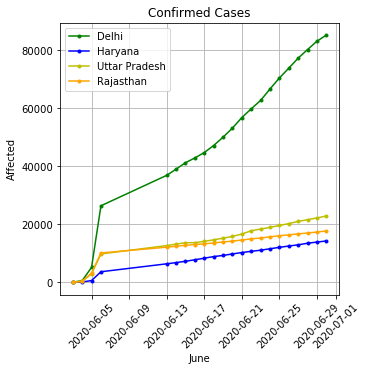

In [204]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
plt.title("Confirmed Cases")
plt.plot(confirmed,'g',marker='.',label="Delhi")
plt.plot(covid_19_Haryana[['Confirmed']],'b',marker='.',label='Haryana')
plt.plot(covid_19_Uttar_Pradesh[['Confirmed']],'y',marker='.',label="Uttar Pradesh")
plt.plot(covid_19_Rajasthan[['Confirmed']],'orange',marker='.',label="Rajasthan")
plt.xlabel('June')
plt.ylabel('Affected')
plt.grid()
plt.legend()
plt.savefig("Confirmed.png")

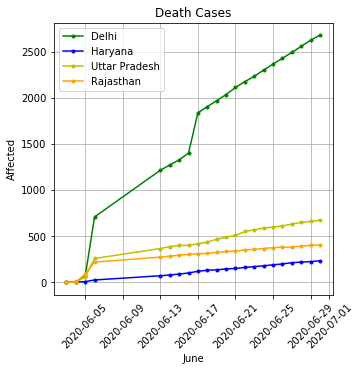

In [205]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
plt.title("Death Cases")
plt.plot(deaths,'g',marker='.',label="Delhi")
plt.plot(covid_19_Haryana[['Deaths']],'b',marker='.',label='Haryana')
plt.plot(covid_19_Uttar_Pradesh[['Deaths']],'y',marker='.',label="Uttar Pradesh")
plt.plot(covid_19_Rajasthan[['Deaths']],'orange',marker='.',label="Rajasthan")
plt.xlabel('June')
plt.ylabel('Affected')
plt.grid()
plt.legend()
plt.savefig("Deaths.png")

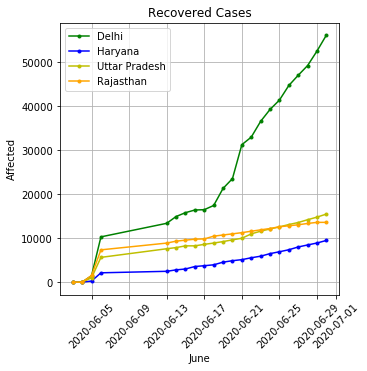

In [206]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
plt.title("Recovered Cases")
plt.plot(recovered,'g',marker='.',label="Delhi")
plt.plot(covid_19_Haryana[['Cured']],'b',marker='.',label='Haryana')
plt.plot(covid_19_Uttar_Pradesh[['Cured']],'y',marker='.',label="Uttar Pradesh")
plt.plot(covid_19_Rajasthan[['Cured']],'orange',marker='.',label="Rajasthan")
plt.xlabel('June')
plt.ylabel('Affected') 
plt.grid()
plt.legend()
plt.savefig("Recovered.png")

In [207]:
def diffrow(data):
    covid_19_con_list=list(data)
    k=list(range(len(covid_19_con_list)))
    for i in range(0,len(covid_19_con_list)):
        if i<1:
            k[i]=covid_19_con_list[i]
        else:
            k[i]=covid_19_con_list[i]-covid_19_con_list[i-1]
    return k

### Adding a 'new cases' column from june1 to 30

In [209]:
covid_19_Delhi['new cases']=diffrow(covid_19_Delhi['Confirmed'])
covid_19_Uttar_Pradesh['new cases']=diffrow(covid_19_Uttar_Pradesh['Confirmed'])
covid_19_Rajasthan['new cases']=diffrow(covid_19_Rajasthan['Confirmed'])
covid_19_Haryana['new cases']=diffrow(covid_19_Haryana['Confirmed'])

<ipython-input-209-d1af00b63171>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Delhi['new cases']=diffrow(covid_19_Delhi['Confirmed'])
<ipython-input-209-d1af00b63171>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Uttar_Pradesh['new cases']=diffrow(covid_19_Uttar_Pradesh['Confirmed'])
<ipython-input-209-d1af00b63171>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

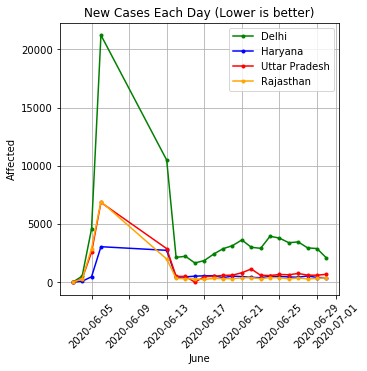

In [210]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=45)
plt.title("New Cases Each Day (Lower is better)")
plt.plot(covid_19_Delhi[['new cases']],'g',marker='.',label="Delhi")
plt.plot(covid_19_Haryana[['new cases']],'b',marker='.',label='Haryana')
plt.plot(covid_19_Uttar_Pradesh[['new cases']],'r',marker='.',label="Uttar Pradesh")
plt.plot(covid_19_Rajasthan[['new cases']],'orange',marker='.',label="Rajasthan")
plt.xlabel('June')
plt.ylabel('Affected')
plt.grid()
plt.legend()
plt.savefig("newCases.png")

### Getting information about hospitalbeds dataset and impoting it for further visualization

In [211]:
covid_hospitalbeds=pd.read_csv("C:/Users/Indranil Maji/Pandemic Analysis/DataSets/HospitalBedsIndia.csv")
covid_hospitalbeds[covid_hospitalbeds['State/UT']=='West Bengal'][['State/UT','NumPublicBeds_HMIS','NumRuralBeds_NHP18','NumUrbanBeds_NHP18']]
covid_hospitalbeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sno                               37 non-null     int64  
 1   State/UT                          37 non-null     object 
 2   NumPrimaryHealthCenters_HMIS      37 non-null     object 
 3   NumCommunityHealthCenters_HMIS    37 non-null     int64  
 4   NumSubDistrictHospitals_HMIS      30 non-null     float64
 5   NumDistrictHospitals_HMIS         37 non-null     int64  
 6   TotalPublicHealthFacilities_HMIS  37 non-null     int64  
 7   NumPublicBeds_HMIS                37 non-null     int64  
 8   NumRuralHospitals_NHP18           37 non-null     int64  
 9   NumRuralBeds_NHP18                37 non-null     int64  
 10  NumUrbanHospitals_NHP18           37 non-null     int64  
 11  NumUrbanBeds_NHP18                37 non-null     int64  
dtypes: float64

In [214]:
covid_19_Delhi1=covid_19[covid_19["State/UnionTerritory"]=="Delhi"]
covid_19_Delhi1['new cases']=diffrow(covid_19_Delhi1['Confirmed'])
covid_19_Delhi1

<ipython-input-214-1f7d6ea34a64>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Delhi1['new cases']=diffrow(covid_19_Delhi1['Confirmed'])


,State/UnionTerritory,Cured,Deaths,Confirmed,new cases
Date,,,,,
2020-06-03,Delhi,0,0,3,3
2020-06-04,Delhi,19,7,523,520
2020-06-05,Delhi,1468,64,5104,4581
2020-06-06,Delhi,10315,708,26334,21230
2020-06-13,Delhi,13398,1214,36824,10490
2020-06-14,Delhi,14945,1271,38958,2134
2020-06-15,Delhi,15823,1327,41182,2224
2020-06-16,Delhi,16427,1400,42829,1647
2020-06-17,Delhi,16500,1837,44688,1859


### Adding a new column of Public_Beds_Left to covid_19 dataframe

In [215]:
total_beds=list(range(len(covid_hospitalbeds)))
list1=list(covid_hospitalbeds['NumPublicBeds_HMIS'])
list2=list(covid_hospitalbeds['NumRuralBeds_NHP18'])
list3=list(covid_hospitalbeds['NumUrbanBeds_NHP18'])
for i in range(0,len(list1)):
    total_beds[i]=list1[i]
covid_hospitalbeds['Total_Beds']=total_beds
k=covid_hospitalbeds.loc[35][12]
k=int(k)
def bedsleft(l,k):
    ln=list(range(len(list(l))))
    nc=list(l)
    for i in range(0,len(nc)):
        if(k>0):
            if k>nc[i]:
                ln[i]=k=k-nc[i]
            else:
                ln[i]=k=nc[i]-k
        else:
            ln[i]=0
    return ln
covid_19_Delhi1["Public_Beds_Left"]=bedsleft(covid_19_Delhi1['new cases'],k)

covid_19_Delhi2=covid_19_Delhi1["2020-06-01":"2020-07-01"]

<ipython-input-215-c958fc316b01>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Delhi1["Public_Beds_Left"]=bedsleft(covid_19_Delhi1['new cases'],k)


In [221]:
covid_19_Haryana1=covid_19[covid_19["State/UnionTerritory"]=="Haryana"]
covid_19_Haryana1['new cases']=diffrow(covid_19_Haryana1['Confirmed'])
ko=covid_hospitalbeds[covid_hospitalbeds['State/UT']=="Haryana"]['Total_Beds']
covid_19_Haryana1['Public_Beds_Left']=bedsleft(covid_19_Haryana1['new cases'],int(ko))
covid_19_Haryana1
covid_19_Haryana2=covid_19_Haryana1["2020-06-01":"2020-07-01"]

<ipython-input-221-cc7f417ae048>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Haryana1['new cases']=diffrow(covid_19_Haryana1['Confirmed'])
<ipython-input-221-cc7f417ae048>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Haryana1['Public_Beds_Left']=bedsleft(covid_19_Haryana1['new cases'],int(ko))


In [218]:
covid_19_Uttar_Pradesh1=covid_19[covid_19["State/UnionTerritory"]=="Uttar Pradesh"]
covid_19_Uttar_Pradesh1['new cases']=diffrow(covid_19_Uttar_Pradesh1['Confirmed'])
kb=covid_hospitalbeds[covid_hospitalbeds['State/UT']=="Uttar Pradesh"]['Total_Beds']
covid_19_Uttar_Pradesh1['Public_Beds_Left']=bedsleft(covid_19_Uttar_Pradesh1['new cases'],int(kb))
covid_19_Uttar_Pradesh2=covid_19_Uttar_Pradesh1["2020-06-01":"2020-07-01"]

<ipython-input-218-b390fb9a982f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Uttar_Pradesh1['new cases']=diffrow(covid_19_Uttar_Pradesh1['Confirmed'])
<ipython-input-218-b390fb9a982f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Uttar_Pradesh1['Public_Beds_Left']=bedsleft(covid_19_Uttar_Pradesh1['new cases'],int(kb))


In [219]:
covid_19_Rajasthan1=covid_19[covid_19["State/UnionTerritory"]=="Rajasthan"]
covid_19_Rajasthan1['new cases']=diffrow(covid_19_Rajasthan1['Confirmed'])
ko=covid_hospitalbeds[covid_hospitalbeds['State/UT']=="Rajasthan"]['Total_Beds']
covid_19_Rajasthan1['Public_Beds_Left']=bedsleft(covid_19_Rajasthan1['new cases'],int(ko))
covid_19_Rajasthan1
covid_19_Rajasthan2=covid_19_Rajasthan1["2020-06-01":"2020-07-01"]

<ipython-input-219-561ba5baef4b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Rajasthan1['new cases']=diffrow(covid_19_Rajasthan1['Confirmed'])
<ipython-input-219-561ba5baef4b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_Rajasthan1['Public_Beds_Left']=bedsleft(covid_19_Rajasthan1['new cases'],int(ko))


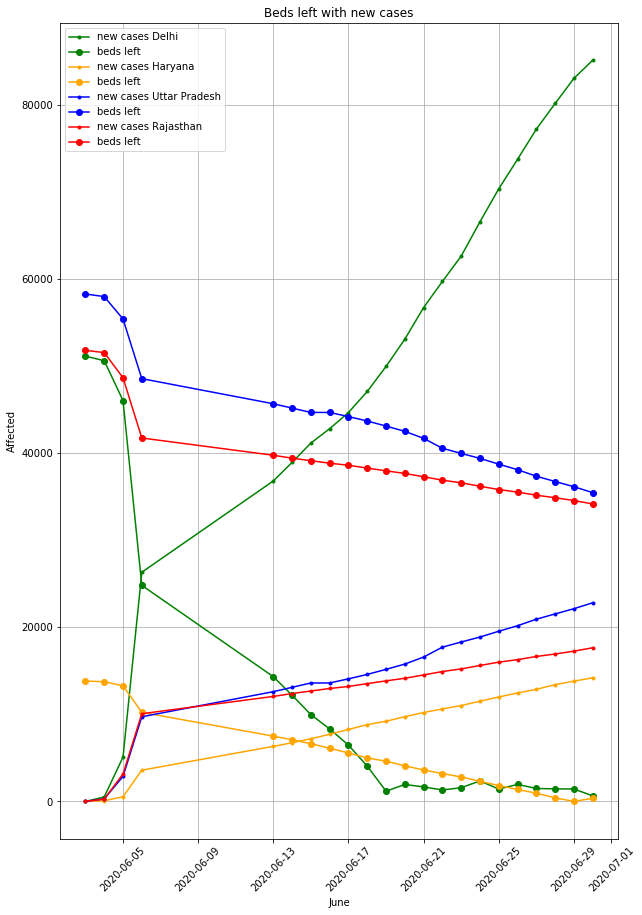

In [222]:
plt.figure(figsize=(10,15))
plt.xticks(rotation=45)
plt.title("Beds left with new cases")
plt.plot(covid_19_Delhi2[['Confirmed']],'g',marker='.',label="new cases Delhi")
plt.plot(covid_19_Delhi2[['Public_Beds_Left']],'g',marker='o',label='beds left')
plt.plot(covid_19_Haryana2[['Confirmed']],'orange',marker='.',label="new cases Haryana")
plt.plot(covid_19_Haryana2[['Public_Beds_Left']],'orange',marker='o',label='beds left')
plt.plot(covid_19_Uttar_Pradesh2[['Confirmed']],'blue',marker='.',label="new cases Uttar Pradesh")
plt.plot(covid_19_Uttar_Pradesh2[['Public_Beds_Left']],'blue',marker='o',label='beds left')
plt.plot(covid_19_Rajasthan2[['Confirmed']],'red',marker='.',label="new cases Rajasthan")
plt.plot(covid_19_Rajasthan2[['Public_Beds_Left']],'red',marker='o',label='beds left')
plt.xlabel('June')
plt.ylabel('Affected')
plt.grid()
plt.legend()
plt.savefig("BedsLeft.png")

<ipython-input-288-b37ff75e5c55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_dl['new cases']=diffrow(covid_19_dl['Confirmed'])
<ipython-input-288-b37ff75e5c55>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_19_dl['Public_Beds_Left']=bedsleft(covid_19_dl['new cases'],int(ko))


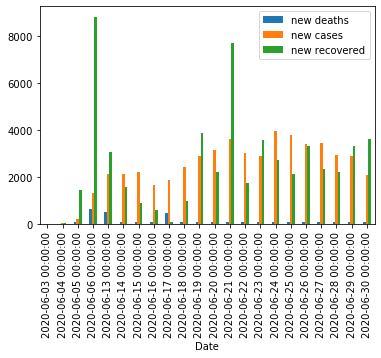

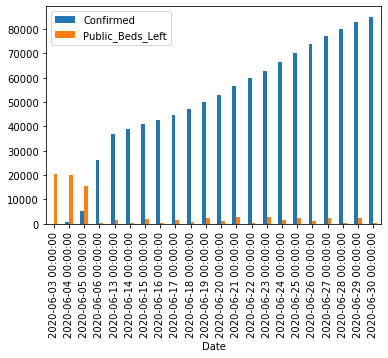

In [288]:
covid_19=pd.read_csv("C:/Users/Indranil Maji/Pandemic Analysis/DataSets/covid_19_india.csv",parse_dates=['Date'])
covid_19_dl=covid_19[covid_19['State/UnionTerritory']==("Delhi")]
covid_19_dl['new cases']=diffrow(covid_19_dl['Confirmed'])
ko=covid_hospitalbeds[covid_hospitalbeds['State/UT']=="Delhi"]['NumPublicBeds_HMIS']
covid_19_dl['Public_Beds_Left']=bedsleft(covid_19_dl['new cases'],int(ko))
covid_19_dl=covid_19_dl[(covid_19_dl['Date']>"2020-06-01") & (covid_19_dl['Date']<"2020-07-01")]

covid_19_dl['new deaths']=diffrow(covid_19_dl['Deaths'])
covid_19_dl['new recovered']=diffrow(covid_19_dl['Cured'])
covid_19_dl.plot(kind="bar",x="Date",y=["new deaths","new cases",'new recovered'])
covid_19_dl.plot(kind="bar",x="Date",y=["Confirmed",'Public_Beds_Left'])
plt.show()

In [286]:
covid_19_dl

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,new cases,Public_Beds_Left,new deaths,new recovered
51,52,2020-06-03,6:00 PM,Delhi,3,0,0,0,3,1,20569,0,0
685,686,2020-06-04,6:00 PM,Delhi,-,-,19,7,523,20,20049,7,19
1646,1647,2020-06-05,8:00 AM,Delhi,-,-,1468,64,5104,206,15468,57,1449
2710,2711,2020-06-06,8:00 AM,Delhi,-,-,10315,708,26334,1330,448,644,8847
2963,2964,2020-06-13,8:00 AM,Delhi,-,-,13398,1214,36824,2137,1710,506,3083
2999,3000,2020-06-14,8:00 AM,Delhi,-,-,14945,1271,38958,2134,424,57,1547
3035,3036,2020-06-15,8:00 AM,Delhi,-,-,15823,1327,41182,2224,1800,56,878
3071,3072,2020-06-16,8:00 AM,Delhi,-,-,16427,1400,42829,1647,153,73,604
3107,3108,2020-06-17,8:00 AM,Delhi,-,-,16500,1837,44688,1859,1706,437,73
3143,3144,2020-06-18,8:00 AM,Delhi,-,-,17457,1904,47102,2414,708,67,957
